In [1]:
from astropy.table import Table
from astropy.io import fits
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats
import scipy.optimize

In [2]:
#columns: smid | savg | corr0(s) | corr2(s) | corr4(s) | std0(s) | std2(s) | std4(s)
#           0      1       2          3          4         5         6         7
xipoles_sv3 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/smu/xipoles_BGS_BRIGHT_NScomb_0.1_0.5_default_log1_njack60_nran4_split20.txt')
xipoles = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/smu/xipoles_BGS_BRIGHT_NScomb_0.1_0.5fullonly_default_log1_njack60_nran4_split20.txt')

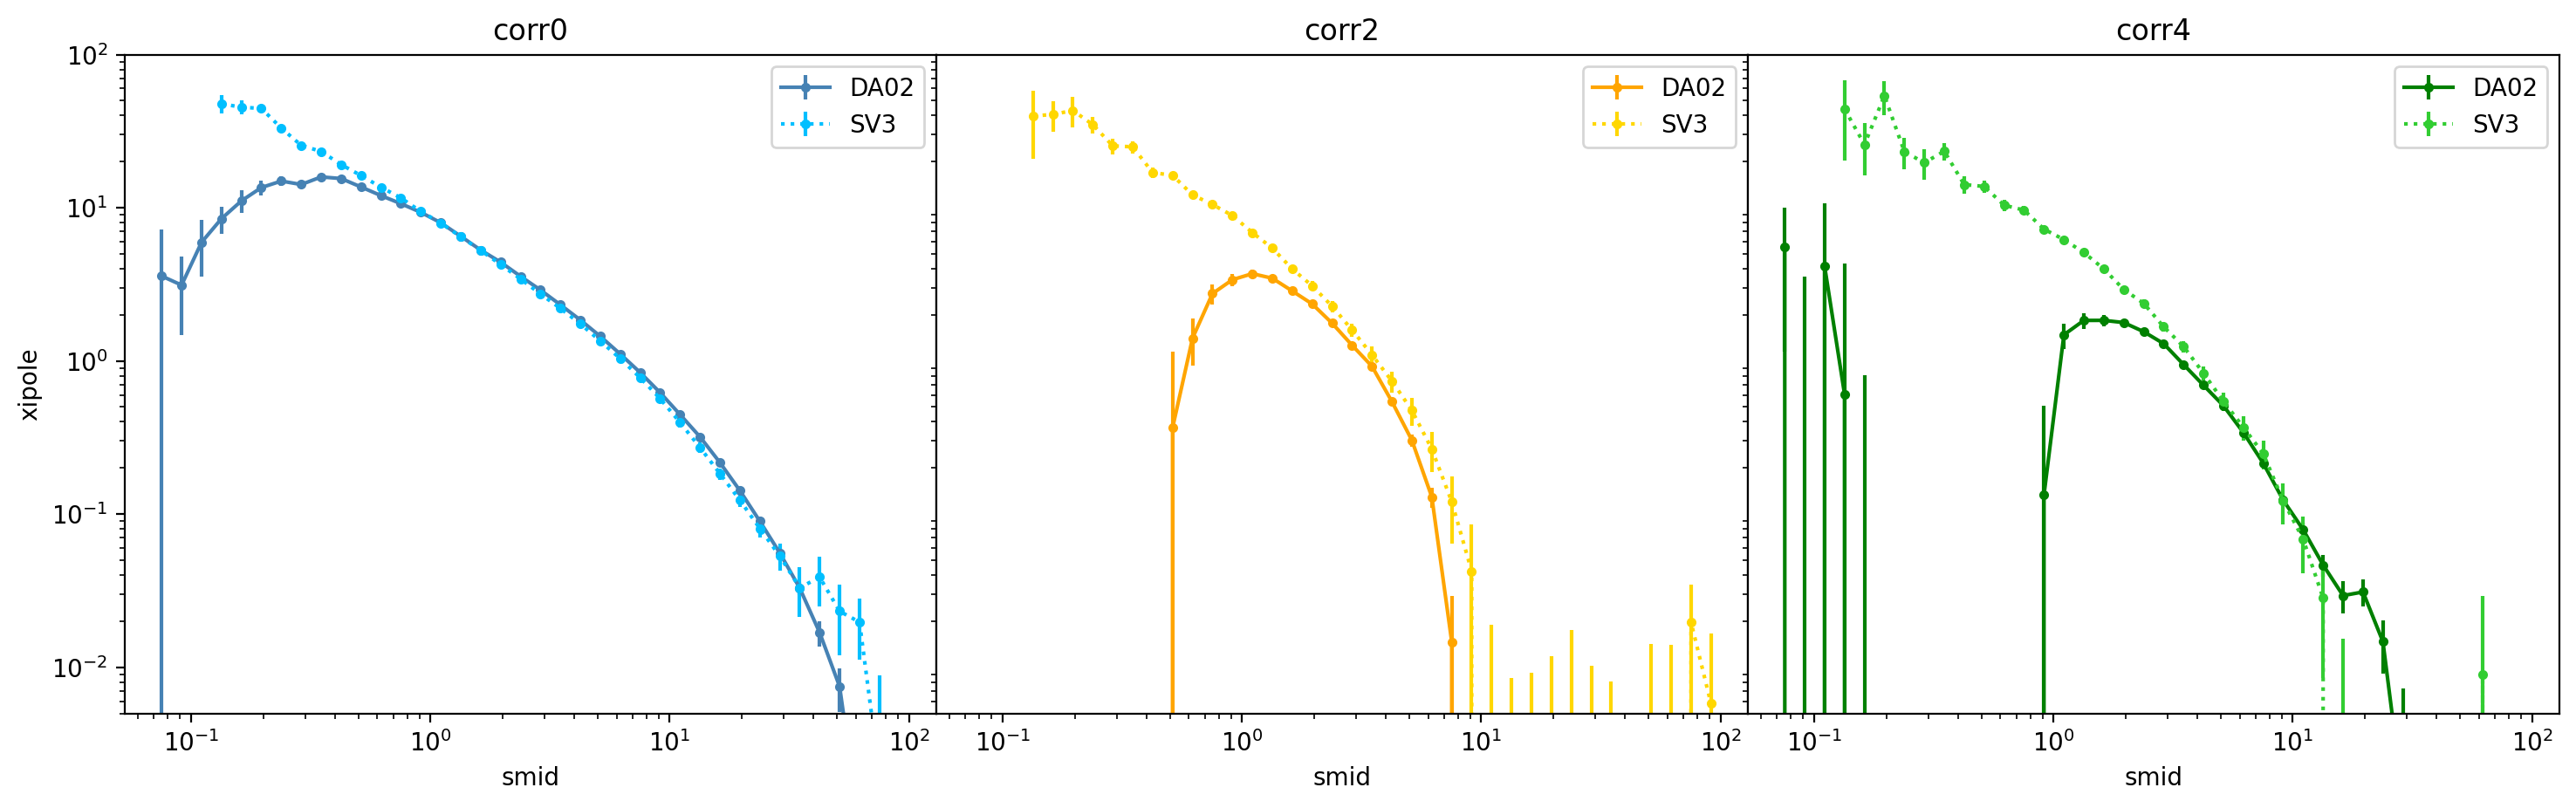

In [3]:
fig, ax = plt.subplots(figsize=(18,5),dpi=200)

ax1 = plt.subplot(131)
plt.title('corr0')
ax1.errorbar(xipoles[:,0], xipoles[:,2], yerr=xipoles[:,5], marker='o', markersize=3, label='DA02', color='steelblue')
ax1.errorbar(xipoles_sv3[:,0], xipoles_sv3[:,2], yerr=xipoles_sv3[:,5], marker='o', markersize=3, label='SV3', color='deepskyblue', ls=':')
plt.xlabel('smid')
plt.ylabel('xipole')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(5*10**-3, 10**2)
plt.legend()

ax2 = plt.subplot(132)
plt.title('corr2')
ax2.errorbar(xipoles[:,0], xipoles[:,3], yerr=xipoles[:,6], marker='o', markersize=3, label='DA02', color='orange')
ax2.errorbar(xipoles_sv3[:,0], xipoles_sv3[:,3], yerr=xipoles_sv3[:,6], marker='o', markersize=3, label='SV3', color='gold', ls=':')
plt.xlabel('smid')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yticks([])
plt.ylim(5*10**-3, 10**2)
plt.legend()

ax3 = plt.subplot(133)
plt.title('corr4')
ax3.errorbar(xipoles[:,0], xipoles[:,4], yerr=xipoles[:,7], marker='o', markersize=3, label='DA02', color='green')
ax3.errorbar(xipoles_sv3[:,0], xipoles_sv3[:,4], yerr=xipoles_sv3[:,7], marker='o', markersize=3, label='SV3', color='limegreen', ls=':')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yticks([])
plt.ylim(5*10**-3, 10**2)
plt.xlabel('smid')
plt.legend()

plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8/da02_xipoles_15log2.png')

In [4]:
#columns rpmid | rpavg | corr(rp) | std(rp)
#          0       1        2         3
wp_da02 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/wp_BGS_BRIGHT_NScomb_0.1_0.5fullonly_default_log2_njack60_nran4_split20.txt')
wp_sv3 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_NScomb_0.1_0.5_default_log2_njack60_nran4_split20.txt')

wp_da02_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/wp_BGS_BRIGHT_N_0.1_0.5fullonly_default_log2_njack60_nran4_split20.txt')
wp_da02_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/wp_BGS_BRIGHT_N_0.1_0.5fullonly_default_log2_njack60_nran4_split20.txt')

wp_sv3_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_N_0.1_0.5_default_log2_njack60_nran4_split20.txt')
wp_sv3_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_S_0.1_0.5_default_log2_njack60_nran4_split20.txt')

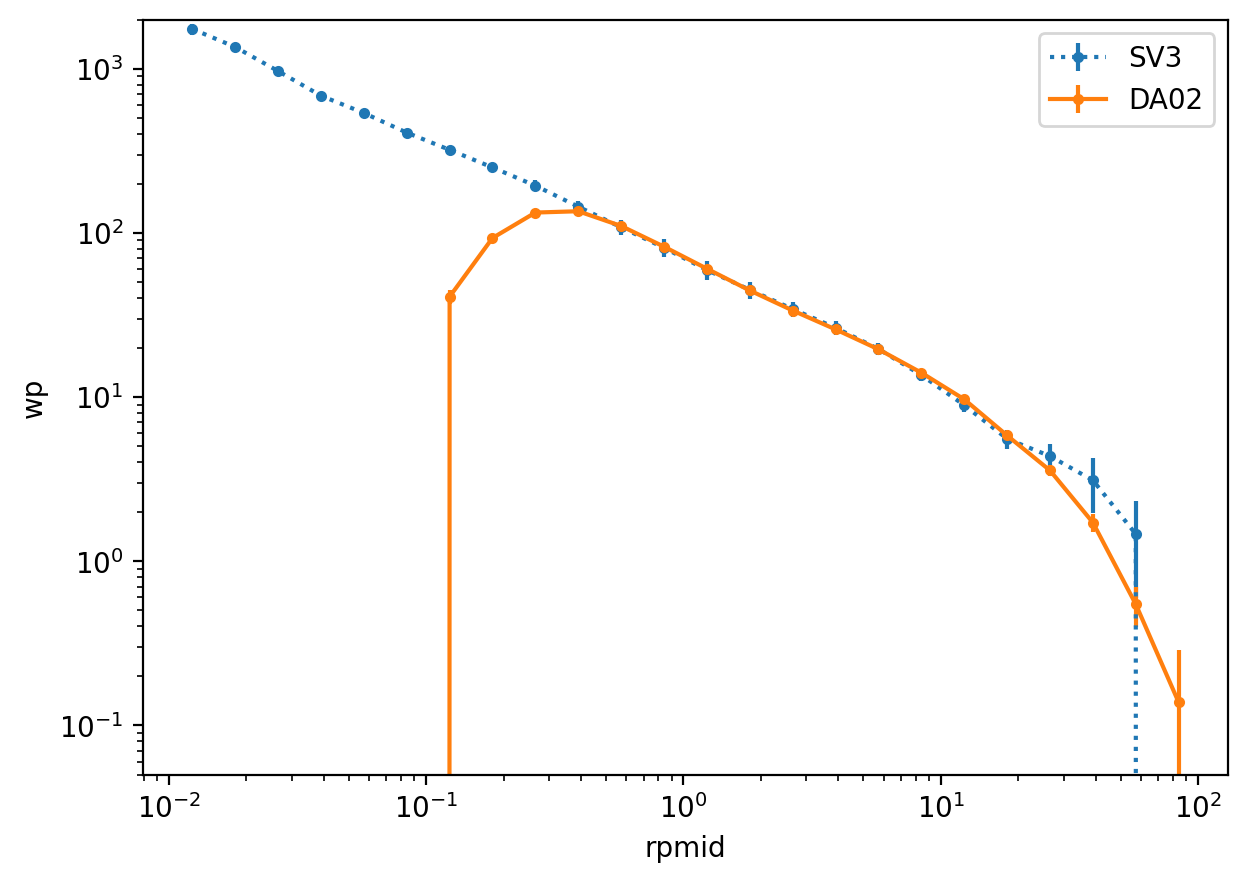

In [5]:
fig, ax1 = plt.subplots(figsize=(7,5), dpi=200)

ax1.errorbar(wp_sv3[:,0], wp_sv3[:,2], yerr=wp_sv3[:,3], marker='o', markersize=3, label='SV3', ls=':')
ax1.errorbar(wp_da02[:,0], wp_da02[:,2], yerr=wp_da02[:,3], marker='o', markersize=3, label='DA02')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(0.05,2*10**3)
plt.ylabel('wp')
plt.xlabel('rpmid')
plt.legend()
plt.savefig('../figures/week8/da02_wp_15log2.png')

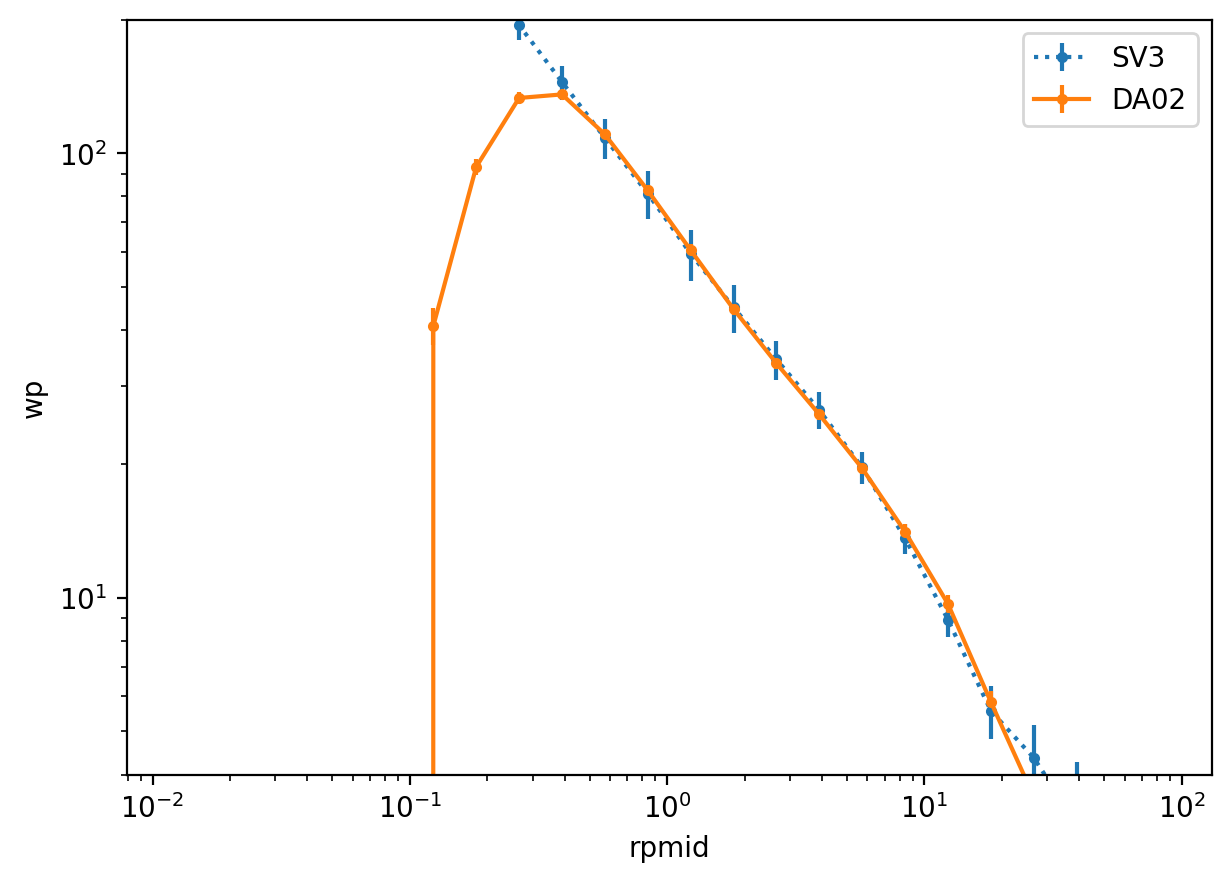

In [6]:
fig, ax1 = plt.subplots(figsize=(7,5), dpi=200)

ax1.errorbar(wp_sv3[:,0], wp_sv3[:,2], yerr=wp_sv3[:,3], marker='o', markersize=3, label='SV3', ls=':')
ax1.errorbar(wp_da02[:,0], wp_da02[:,2], yerr=wp_da02[:,3], marker='o', markersize=3, label='DA02')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(4,200)
plt.ylabel('wp')
plt.xlabel('rpmid')
plt.legend()
plt.savefig('../figures/week8/da02_wp_15log2_zoomed.png')

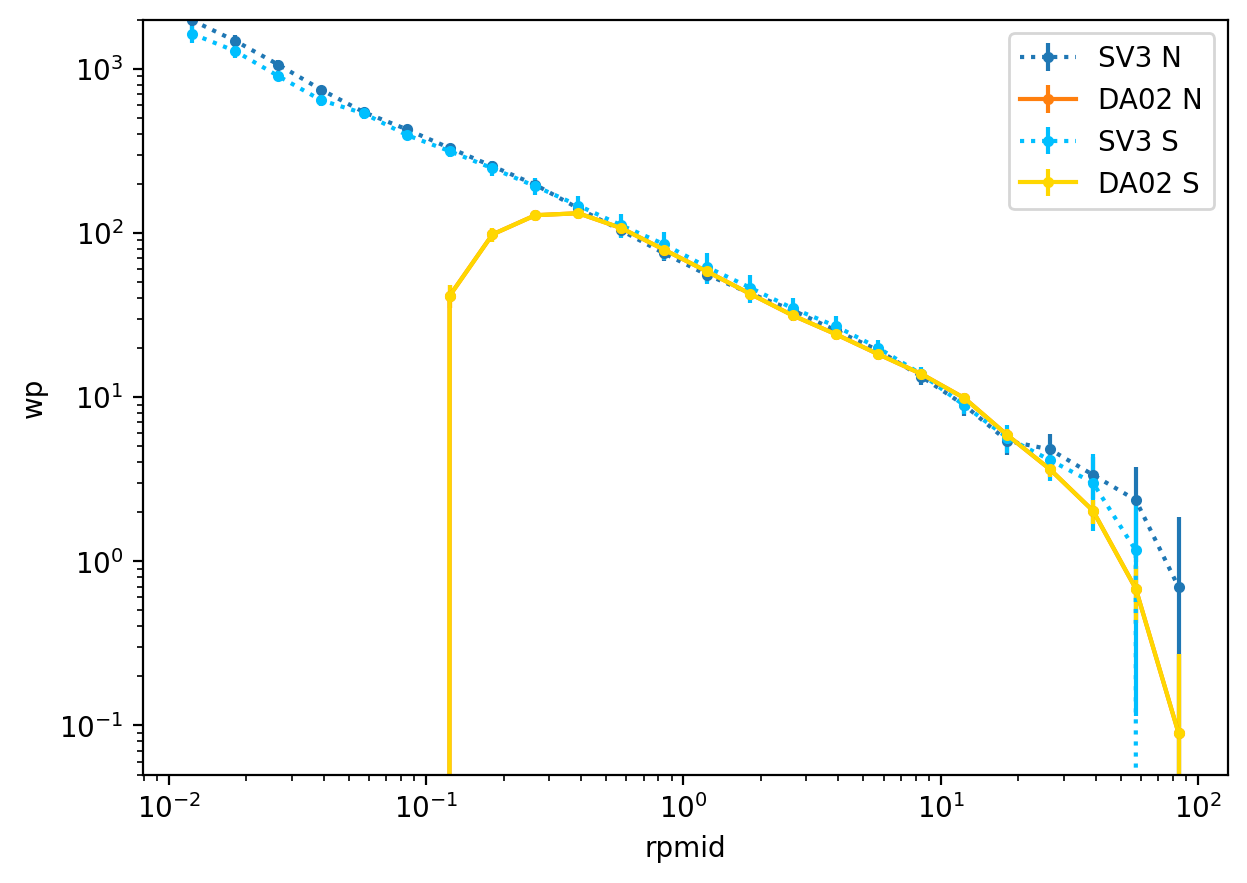

In [8]:
fig, ax1 = plt.subplots(figsize=(7,5), dpi=200)

ax1.errorbar(wp_sv3_N[:,0], wp_sv3_N[:,2], yerr=wp_sv3_N[:,3], marker='o', markersize=3, label='SV3 N', ls=':', color='tab:blue')
ax1.errorbar(wp_da02_N[:,0], wp_da02_N[:,2], yerr=wp_da02_N[:,3], marker='o', markersize=3, label='DA02 N', color='tab:orange')

ax1.errorbar(wp_sv3_S[:,0], wp_sv3_S[:,2], yerr=wp_sv3_S[:,3], marker='o', markersize=3, label='SV3 S', ls=':', color='deepskyblue')
ax1.errorbar(wp_da02_S[:,0], wp_da02_S[:,2], yerr=wp_da02_S[:,3], marker='o', markersize=3, label='DA02 S', color='gold')

ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(0.05,2*10**3)
plt.ylabel('wp')
plt.xlabel('rpmid')

plt.legend()
plt.savefig('../figures/week8/da02_wp_15log2_NS_orig.png')